In [ ]:
!pip install pycaret==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [1]:
from pycaret.datasets import get_data

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('ConsumoEnergiaADINELSA202303_Version1.csv')

In [5]:
data.head()

,FECHA_CORTE,PERIODO_FACTURACION,UUID,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,LOCALIDAD,TARIFA,CONSUMO_KW,POTENCIA_CONTRATADA,MONTO_SOLES
0,20230505,202303,C201411252391122761180828,50619,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),BT5B,0.0,1.0,0.0
1,20230505,202303,C202210053901120322180828,50619,AYACUCHO,LUCANAS,SANCOS,SANCOS,BT5B,43.0,1.0,38.6
2,20230505,202303,C201503272391123622180828,50619,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),BT5B,7.0,1.0,0.0
3,20230505,202303,C201503273901120371180828,50619,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),BT5B,57.0,1.0,42.1
4,20230505,202303,C201503273901120434180828,50619,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),BT5B,64.0,1.0,48.9


**PREPROCESAMIENTO**

In [6]:
from pycaret.regression import *

In [7]:
data_t = data

In [8]:
data_t=data_t.drop(['FECHA_CORTE'], axis=1)

In [9]:
data_t=data_t.drop(['PERIODO_FACTURACION'], axis=1)

In [10]:
data_t=data_t.drop(['UUID'], axis=1)

In [11]:
data_t=data_t.drop(['UBIGEO'], axis=1)

In [12]:
data_t=data_t.drop(['TARIFA'], axis=1)

In [13]:
data_t.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,LOCALIDAD,CONSUMO_KW,POTENCIA_CONTRATADA,MONTO_SOLES
0,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),0.0,1.0,0.0
1,AYACUCHO,LUCANAS,SANCOS,SANCOS,43.0,1.0,38.6
2,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),7.0,1.0,0.0
3,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),57.0,1.0,42.1
4,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),64.0,1.0,48.9


In [14]:
s = setup(data_t, target='MONTO_SOLES',
          #normalize=True,
          transform_target=True,
          numeric_imputation='mean',
          categorical_features=['DEPARTAMENTO','PROVINCIA'],
          #profile=True,
          session_id=123)

,Description,Value
0,Session id,123
1,Target,MONTO_SOLES
2,Target type,Regression
3,Original data shape,"(77196, 7)"
4,Transformed data shape,"(77196, 19)"
5,Transformed train set shape,"(54037, 19)"
6,Transformed test set shape,"(23159, 19)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


In [15]:
get_config('X')

,DEPARTAMENTO,PROVINCIA,DISTRITO,LOCALIDAD,CONSUMO_KW,POTENCIA_CONTRATADA
30934,LIMA,BARRANCA,BARRANCA,BARRANCA,9.0,1.0
49095,LIMA,HUARAL,SUMBILCA,SUMBILCA,0.0,1.0
36179,ANCASH,CARLOS F. FITZCARRALD,SAN LUIS,YATUR,6.0,3.0
5993,LIMA,CAÑETE,SAN VICENTE DE CAÑETE,SAN VICENTE DE CA¥ETE,35.0,1.0
7562,ANCASH,CARLOS F. FITZCARRALD,YAUYA,YURAC RANRA,1.0,3.0
...,...,...,...,...,...,...
21358,AYACUCHO,LUCANAS,SANCOS,SANTA FILOMENA (SAN LUIS),92.0,1.0
20333,AYACUCHO,PARINACOCHAS,CORACORA,OCCORURO,5.0,1.0
66162,LIMA,CAÑETE,SAN VICENTE DE CAÑETE,TREBOL DEL PACIFICO,45.0,1.0
9744,LIMA,HUAURA,AMBAR,HUANCOY,25.0,1.0


**ENTRENAMIENTO DE MODELOS**

In [16]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,44.6262,1452587.0651,815.4102,0.4031,1.0502,0.9644,1.2500
dummy,Dummy Regressor,87.0715,1628961.0078,921.8832,-0.0381,2.0719,1.5595,0.4090


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [17]:
lbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.4680,19836.6606,140.8427,0.7357,1.0539,0.9172
1,33.3112,24570.2114,156.7489,0.6353,1.0259,0.9290
2,54.4101,2933529.9512,1712.7551,0.1484,1.0591,1.1436
3,36.0347,39861.8831,199.6544,0.5281,1.0493,0.9085
4,54.8605,1518437.9543,1232.2491,0.0452,1.0669,0.9590
5,31.5124,12105.3759,110.0244,0.8417,1.0655,1.0428
6,40.8425,291839.1372,540.2214,0.2081,1.0546,0.9507
7,81.1418,8676052.3645,2945.5139,0.0739,1.0356,0.9308
8,30.6093,13987.6336,118.2693,0.7248,1.0307,0.8982


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

OPTIMIZANDO MODELO

In [18]:
tuned_rf = tune_model(lbm,
                      optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.8338,31001.0992,176.0713,0.5869,1.0502,0.9535
1,36.0507,30223.2390,173.8483,0.5513,1.0307,0.9689
2,58.2796,2774596.1776,1665.7119,0.1945,1.0548,1.1542
3,38.9183,48356.9462,219.9021,0.4275,1.0559,0.9497
4,55.7574,1530010.2648,1236.9358,0.0379,1.0684,0.9783
5,34.4479,19669.4609,140.2479,0.7428,1.0639,1.0434
6,45.0524,307809.7480,554.8060,0.1648,1.0557,0.9706
7,83.6014,8471796.9314,2910.6351,0.0957,1.0395,0.9582
8,34.0872,20409.8168,142.8629,0.5984,1.0335,0.9275


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


EVALUACIÓN DEL MODELO

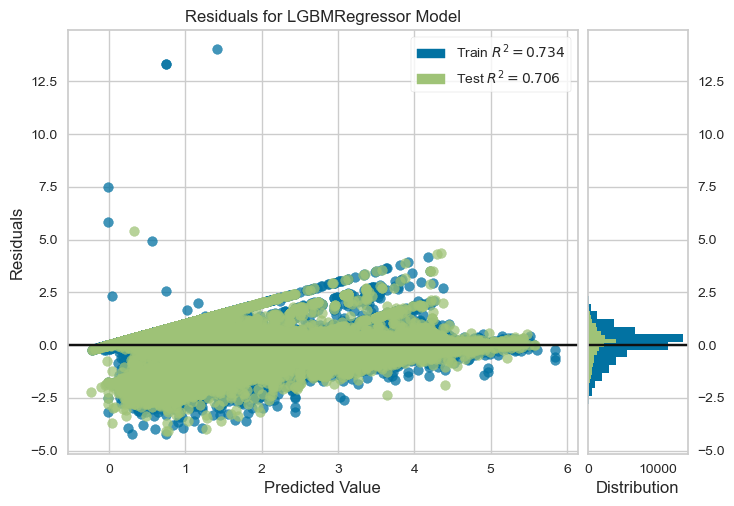

In [19]:
plot_model(tuned_rf)

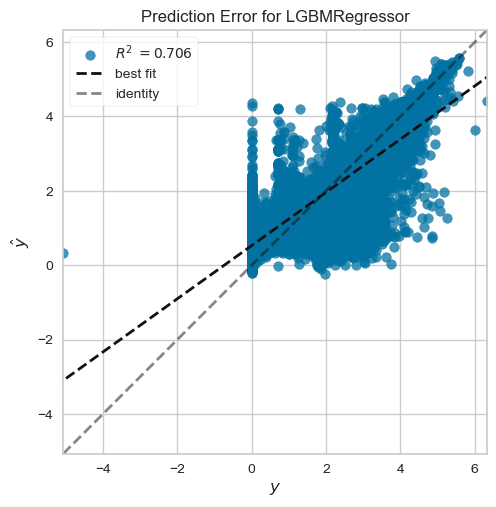

In [20]:
plot_model(tuned_rf, plot='error')

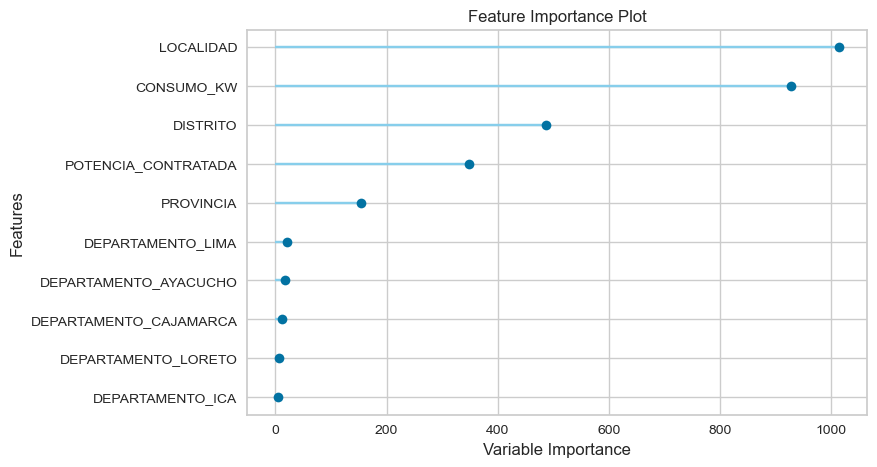

In [21]:
plot_model(tuned_rf, plot='feature')

In [22]:
save_model(tuned_rf, 'modelo_001')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\dijes\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['CONSUMO_KW',
                                              'POTENCIA_CONTRATADA'],
                                     transformer=SimpleImputer())),
                 ('categorical_im...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['DEPARTAMENTO'],
                                     transformer=OneHotEncoder(cols=['DEPARTAMENTO'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('

In [23]:
modelo_001 = load_model('modelo_001')

Transformation Pipeline and Model Successfully Loaded
